<a href="https://colab.research.google.com/github/Abhinandan-Dwivedi/Cat-v-Dog_Classifier/blob/main/02_Cat_v_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download( "https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhinandan17dwivedi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset


100%|██████████| 788M/788M [00:02<00:00, 301MB/s]

In [4]:
import pandas as pd

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , Flatten , MaxPooling2D , BatchNormalization , Dropout

In [7]:
import os
import shutil
import random

source_dir = "/content/microsoft-catsvsdogs-dataset/PetImages"
train_dir = "/content/microsoft-catsvsdogs-dataset/data/train"
val_dir = "/content/microsoft-catsvsdogs-dataset/data/validation"
split_ratio = 0.8  # 80% train, 20% validation

for category in ["Cat", "Dog"]:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

    images = os.listdir(os.path.join(source_dir, category))
    random.shuffle(images)

    split_point = int(len(images) * split_ratio)
    train_images = images[:split_point]
    val_images = images[split_point:]

    for img in train_images:
        shutil.copy(os.path.join(source_dir, category, img),
                    os.path.join(train_dir, category, img))

    for img in val_images:
        shutil.copy(os.path.join(source_dir, category, img),
                    os.path.join(val_dir, category, img))

print("Dataset split completed successfully!")


Dataset split completed successfully!


In [8]:
# #generater
traindf   = keras.utils.image_dataset_from_directory(
   directory= '/content/microsoft-catsvsdogs-dataset/data/train' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
).ignore_errors()
validationdf   = keras.utils.image_dataset_from_directory(
   directory= '/content/microsoft-catsvsdogs-dataset/data/validation' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
).ignore_errors()

Found 19998 files belonging to 3 classes.
Found 5002 files belonging to 3 classes.


In [9]:
# normalization
def process(image ,label):
  image = tf.cast(image/255 , tf.float32)
  return image, label
traindf = traindf.map(process)
validationdf = validationdf.map(process)

In [22]:
# model
model = Sequential()
model.add(Conv2D(32 , kernel_size = (3,3), padding  = 'valid' , activation  = 'relu' , input_shape = (256 , 256 , 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding ='valid'))

model.add(Conv2D(64 , kernel_size = (3,3), padding  = 'valid' , activation  = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding ='valid'))

model.add(Conv2D(128 , kernel_size = (3,3), padding  = 'valid' , activation  = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding ='valid'))

model.add(Flatten())

model.add(Dense(128 , activation  = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation  = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(32 , activation  = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1 , activation  = 'sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile( optimizer = 'Adam',loss ='binary_crossentropy' , metrics = ['accuracy'] )


In [24]:
result = model.fit(traindf , epochs = 7 , validation_data = validationdf )

Epoch 1/7
    617/Unknown 58s 83ms/step - accuracy: 0.5569 - loss: 1.9176

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


617/617 ━━━━━━━━━━━━━━━━━━━━ 67s 97ms/step - accuracy: 0.5569 - loss: 1.9164 - val_accuracy: 0.6215 - val_loss: 0.6312
Epoch 2/7
617/617 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.6508 - loss: 0.6333 - val_accuracy: 0.6738 - val_loss: 0.5922
Epoch 3/7
617/617 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.7241 - loss: 0.5485 - val_accuracy: 0.7682 - val_loss: 0.4874
Epoch 4/7
617/617 ━━━━━━━━━━━━━━━━━━━━ 54s 88ms/step - accuracy: 0.7835 - loss: 0.4595 - val_accuracy: 0.7759 - val_loss: 0.4750
Epoch 5/7
617/617 ━━━━━━━━━━━━━━━━━━━━ 90s 145ms/step - accuracy: 0.8263 - loss: 0.3917 - val_accuracy: 0.8016 - val_loss: 0.4329
Epoch 6/7
617/617 ━━━━━━━━━━━━━━━━━━━━ 56s 91ms/step - accuracy: 0.8653 - loss: 0.3196 - val_accuracy: 0.7992 - val_loss: 0.4725
Epoch 7/7
617/617 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.9020 - loss: 0.2374 - val_accuracy: 0.7968 - val_loss: 0.5240


In [19]:
result

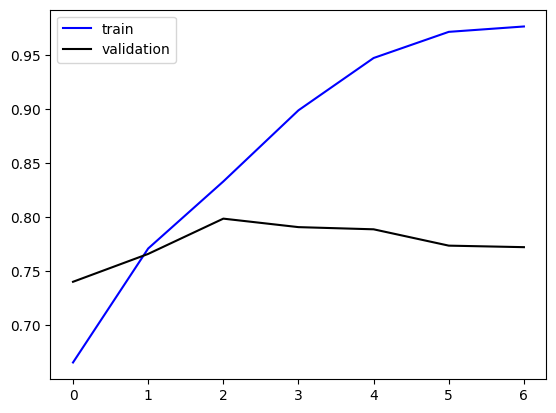

In [18]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'] , color = 'blue', label = 'train')
plt.plot(result.history['val_accuracy'] , color = 'black', label = 'validation')
plt.legend()
plt.show()

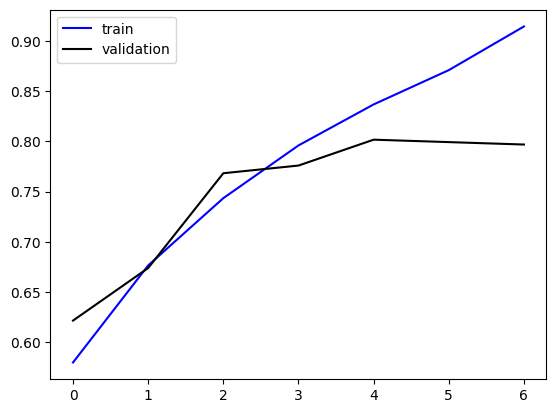

In [25]:
# after Batchprocessing and Dropout
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'] , color = 'blue', label = 'train')
plt.plot(result.history['val_accuracy'] , color = 'black', label = 'validation')
plt.legend()
plt.show()

In [26]:
import cv2

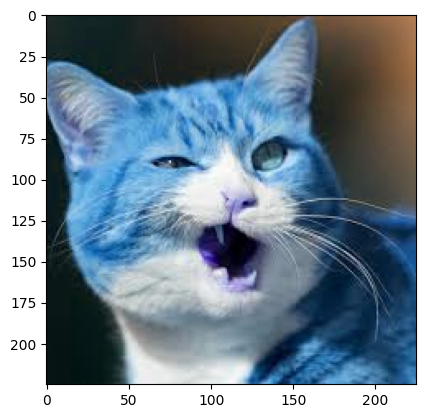

In [42]:
test_arr =  cv2.imread('/content/cat.jpeg')
plt.imshow(test_arr)

In [43]:
test_arr.shape


(225, 225, 3)

In [44]:
test_img = cv2.resize(test_arr , (256, 256))
test_img = test_img.reshape((1, 256 , 256 , 3))

In [45]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)